# __KMEANS CLUSTERING__

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### __Import data set__

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Data Mining in Science/praktikum/4. Clustering/credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## __Select features to cluster__


Here we are going to cluster the observations using BALANCE AND PAYMENT. 

In [3]:
X = df[['BALANCE','PAYMENTS']].values
X_df = df[['BALANCE','PAYMENTS']]
X_df.head()

,BALANCE,PAYMENTS
0,40.900749,201.802084
1,3202.467416,4103.032597
2,2495.148862,622.066742
3,1666.670542,0.000000
4,817.714335,678.334763


## __Check for missing values__


In [4]:
X_df.isnull().describe()

,BALANCE,PAYMENTS
count,8950,8950
unique,1,1
top,False,False
freq,8950,8950


_There are no missing values!_



## __Evaluate possible pumber of clusters__

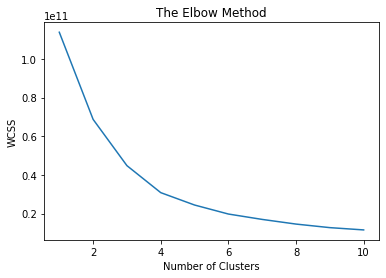

In [5]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(6, 4))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

##__Grouping into 2 clusters__


In [0]:
clf2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf2.fit_predict(X)

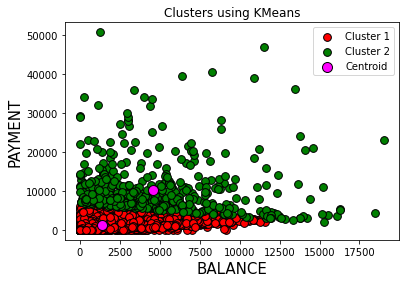

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')

# cluster centres
plt.scatter(clf2.cluster_centers_[:, 0], clf2.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')

plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('PAYMENT', size = 15)
plt.xlabel('BALANCE', size = 15)
plt.show()

## __Showing cluster groups in a dataframe__

In [8]:
df2 = X_df.copy()
df2['Cluster'] = y_kmeans
df2.head()

,BALANCE,PAYMENTS,Cluster
0,40.900749,201.802084,0
1,3202.467416,4103.032597,0
2,2495.148862,622.066742,0
3,1666.670542,0.000000,0
4,817.714335,678.334763,0


## __Summary of clustering result__

In [9]:
df2.groupby("Cluster").count()

,BALANCE,PAYMENTS
Cluster,,
0,8432,8432
1,518,518


_we have 7648 observations in cluster 0, and 1302 in cluster 1_

##__Grouping into 3 clusters__


In [0]:
clf3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf3.fit_predict(X)

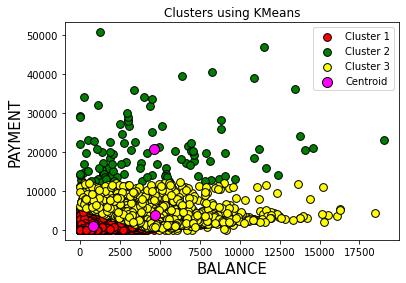

In [11]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='yellow', s=60, label='Cluster 3', edgecolors='black')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='cyan', s=60, label='Cluster 4', edgecolors='black')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='black', s=60, label='Cluster 5', edgecolors='white')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], color='grey', s=60, label='Cluster 6', edgecolors='black')

# cluster centres
plt.scatter(clf3.cluster_centers_[:, 0], clf3.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')

plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('PAYMENT', size = 15)
plt.xlabel('BALANCE', size = 15)
plt.show()

## __Showing cluster groups in a dataframe__

In [12]:
df3 = X_df.copy()
df3['Cluster'] = y_kmeans
df3.head()

,BALANCE,PAYMENTS,Cluster
0,40.900749,201.802084,0
1,3202.467416,4103.032597,2
2,2495.148862,622.066742,0
3,1666.670542,0.000000,0
4,817.714335,678.334763,0


## __Summary of clustering result__

In [13]:
df3.groupby("Cluster").count()

,BALANCE,PAYMENTS
Cluster,,
0,7280,7280
1,105,105
2,1565,1565


##__Grouping into 4 clusters__


In [0]:
clf4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf4.fit_predict(X)

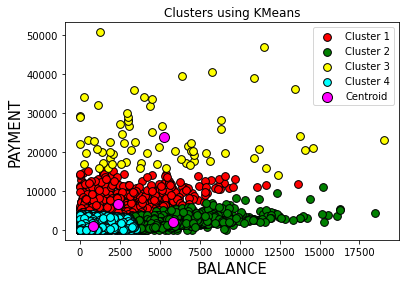

In [15]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='yellow', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='cyan', s=60, label='Cluster 4', edgecolors='black')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='black', s=60, label='Cluster 5', edgecolors='white')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], color='grey', s=60, label='Cluster 6', edgecolors='black')

# cluster centres
plt.scatter(clf4.cluster_centers_[:, 0], clf4.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')

plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('PAYMENT', size = 15)
plt.xlabel('BALANCE', size = 15)
plt.show()

## __Showing cluster groups in a dataframe__

In [16]:
df4 = X_df.copy()
df4['Cluster'] = y_kmeans
df4.head()

,BALANCE,PAYMENTS,Cluster
0,40.900749,201.802084,3
1,3202.467416,4103.032597,0
2,2495.148862,622.066742,3
3,1666.670542,0.000000,3
4,817.714335,678.334763,3


## __Summary of clustering result__

In [17]:
df4.groupby("Cluster").count()

,BALANCE,PAYMENTS
Cluster,,
0,761,761
1,1024,1024
2,72,72
3,7093,7093


##__Grouping into 5 clusters__


In [0]:
clf5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf5.fit_predict(X)

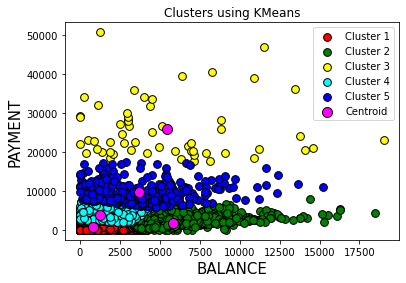

In [19]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='yellow', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='cyan', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='blue', s=60, label='Cluster 5', edgecolors='black')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], color='grey', s=60, label='Cluster 6', edgecolors='black')

# cluster centres
plt.scatter(clf5.cluster_centers_[:, 0], clf5.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')

plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('PAYMENT', size = 15)
plt.xlabel('BALANCE', size = 15)
plt.show()

## __Showing cluster groups in a dataframe__

In [20]:
df5 = X_df.copy()
df5['Cluster'] = y_kmeans
df5.head()

,BALANCE,PAYMENTS,Cluster
0,40.900749,201.802084,0
1,3202.467416,4103.032597,3
2,2495.148862,622.066742,0
3,1666.670542,0.000000,0
4,817.714335,678.334763,0


## __Summary of clustering result__

In [21]:
df5.groupby("Cluster").count()

,BALANCE,PAYMENTS
Cluster,,
0,6357,6357
1,1003,1003
2,57,57
3,1212,1212
4,321,321


##__Grouping into 6 clusters__


In [0]:
clf6 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf6.fit_predict(X)

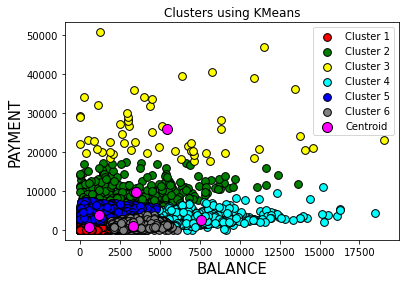

In [23]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='yellow', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='cyan', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='blue', s=60, label='Cluster 5', edgecolors='black')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], color='grey', s=60, label='Cluster 6', edgecolors='black')

# cluster centres
plt.scatter(clf6.cluster_centers_[:, 0], clf6.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')

plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('PAYMENT', size = 15)
plt.xlabel('BALANCE', size = 15)
plt.show()

## __Showing cluster groups in a dataframe__

In [24]:
df6 = X_df.copy()
df6['Cluster'] = y_kmeans
df6.head()

,BALANCE,PAYMENTS,Cluster
0,40.900749,201.802084,0
1,3202.467416,4103.032597,4
2,2495.148862,622.066742,5
3,1666.670542,0.000000,0
4,817.714335,678.334763,0


## __Summary of clustering result__

In [25]:
df6.groupby("Cluster").count()

,BALANCE,PAYMENTS
Cluster,,
0,5611,5611
1,298,298
2,57,57
3,479,479
4,1129,1129
5,1376,1376
